# Project:6 Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history,
loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):
- Loan_Status

Objective :
To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [8]:
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [9]:
#code for maximise rows ,columns,width,frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [10]:
df=pd.read_csv("loan_prediction.csv")  
df.head()  #Checking out the top 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Observation: 1.There are 907 rows and 27 columns.

2.Both numeric and categorical values are observed.

3.This is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.
Loan status can have two values: Yes or NO.Yes: if the loan is approved NO: if the loan is not approved.

In [11]:
df.shape    #Checking the dimensions of the dataset

(614, 13)

There are 614 rows and 13 columns

In [12]:
df.dtypes #checking datatypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 categorical columns and 4 float datatype and 1 int datatype.Categorical column need to be converted into numeric type before model building

In [13]:
df.columns #names of 27 features/columns names

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], dtype='object')

In [14]:
# description of the categorcal features
df.describe(include=np.object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002833,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Obervation: 
1.Missing values are present which is evident from count in gender,married,dependent,self_employed column .

2.There are 2 distinct category in gender,2 in married,4 in dependents,2 in education,2 in self_employed,3 in property_area,1 in loan status


In [15]:
# description of  numerical feautres description:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Observation:
1.missing value which can be seen from the count section.

2.Average applicant income is 5403 and maximum is 81000.

3.Minimum loan amount is 9.0 and maximum is 700(this may be in terms of lakhs)

4.High standard deviation in applicant income and coapplicant income.

5.84.23% of the people have their past credit guidelines met.

6.Min loan term is 1 year(12 months) and maximum is 4 years(480 months)There is a quite high difference in mean and median value which means that dataset is having skewness in daily rate,employee number,hourly rate,mnthly income,monthly rate.

7.The difference between 75th percentile and maximum value is large for most columns and from this we can assume that there are outliers present.

In [16]:
df.nunique().to_frame("Unique Values")

,Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


THus we see that it shows the distinct values under each category.

In [17]:
df.drop("Loan_ID", axis=1, inplace=True)

Droping the Loan-ID asit represents uniquie identifer and irrelevant for predicting loan_status

In [18]:
df.isnull().sum()   #Checking for null values in the datas

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There is  missing value in the dataset ,so we need to apply imutation technique

<AxesSubplot:>

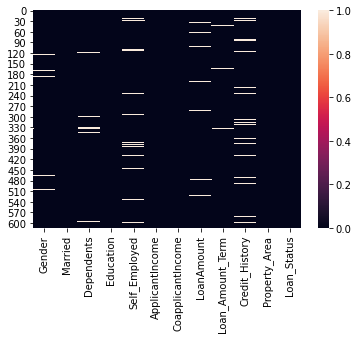

In [19]:
sns.heatmap(df.isnull()) 

 The visual representation shows there is lots of  missing value

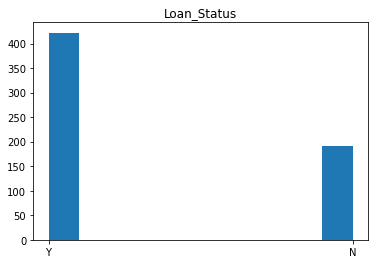

In [20]:
df["Loan_Status"].hist(grid=False)
plt.title("Loan_Status")
plt.show()

Thus we can see that target variable is imbalance,we will be applying smote technique to baalance it later. 

In [21]:
obj = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
len(obj)

7

length of the obj column is 7

In [22]:
non_obj= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
len(non_obj)

5

length of the non_object column is 5

# Univariate Analysis

univariate Analysis for categorical columns

In [23]:
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df[obj].value_counts())
    plt.figure()
    df[obj].value_counts().plot.bar(title="Frequency Distribution of " + obj)#, color = "blue")
    plt.show()
    print("       ")

Details of Gender
----------------------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64


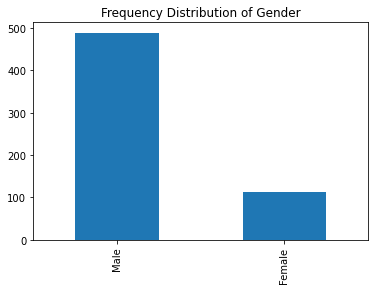

       
Details of Married
----------------------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64


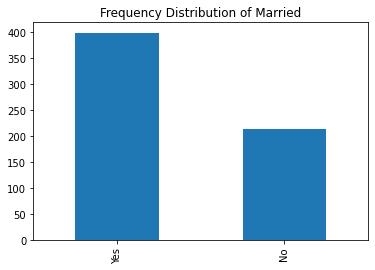

       
Details of Dependents
----------------------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


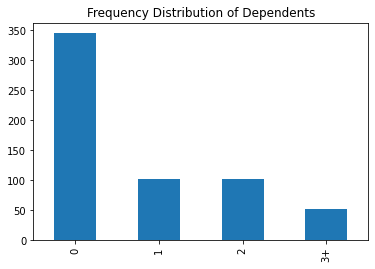

       
Details of Education
----------------------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


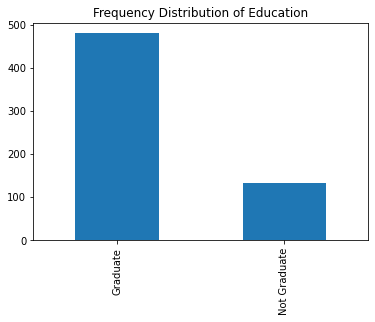

       
Details of Self_Employed
----------------------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64


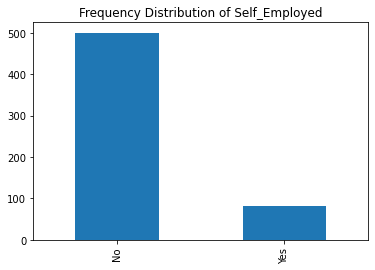

       
Details of Property_Area
----------------------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


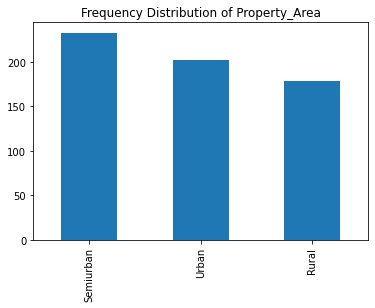

       
Details of Loan_Status
----------------------------------------------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64


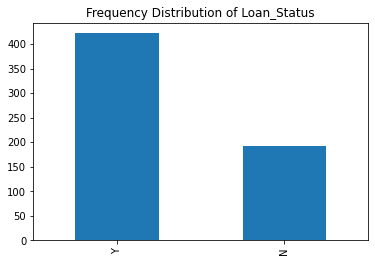

In [24]:
for x in obj:
    univariateAnalysis_category(x)

Observation:

The frequency distribution plot shows that  it is a graph or data set organized to represent the frequency of 
occurrence of each possible outcome of an event that is observed a specific number of times. In terms of gender,male are more in number than female.in terms of relationship status,
 married are more than un_married.In terms of dependent,independent are more in number than dependent on 1 /2/3+.
Interms of eductaion,In terms of property area,graduated are prerfer more than non_graduated,In terms of self-employed,those who are not self _emplyed are more in number .In terms of property area,those who lived in semi uran are
 more in number followed by urban and rural.

<Figure size 432x288 with 0 Axes>

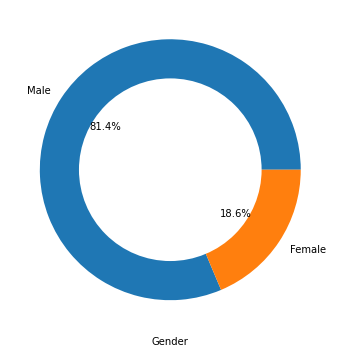

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Gender")
plt.ylabel('')
plt.figure()    

By using pie plor,we observe that there are 81.4% male covered in gender and female is 18.6%

<Figure size 432x288 with 0 Axes>

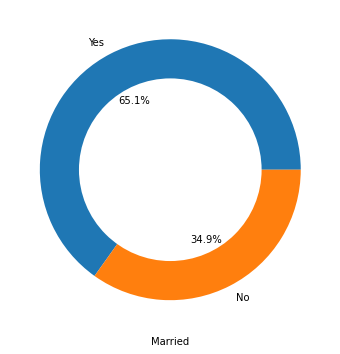

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(8,6))
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Married")
plt.ylabel('')
plt.figure()  

There are 65.1% are married whereas 34.9% of the rows covered with unmarried.

<Figure size 432x288 with 0 Axes>

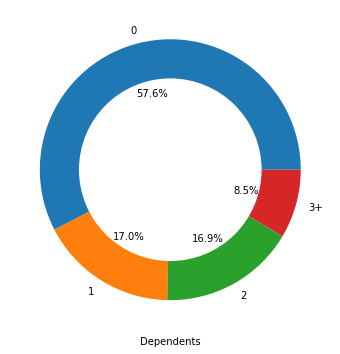

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(8,6))
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Dependents")
plt.ylabel('')
plt.figure()  

We see that 57.6 % of the people who are applying for loan are not having dependents ,around 17% people are havine 
one dependents followed by 16.9% people having 2 dependents and rest 8.5% are having more than 3 dependents.

<Figure size 432x288 with 0 Axes>

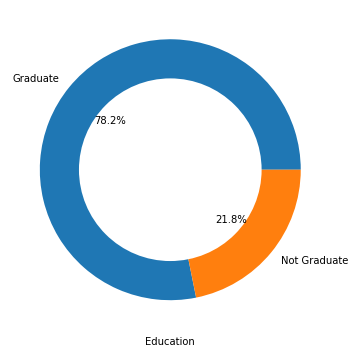

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(8,6))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Education")
plt.ylabel('')
plt.figure()  

Around 78.2% of the people are graduated and 21.8 people are not graduated.

<Figure size 432x288 with 0 Axes>

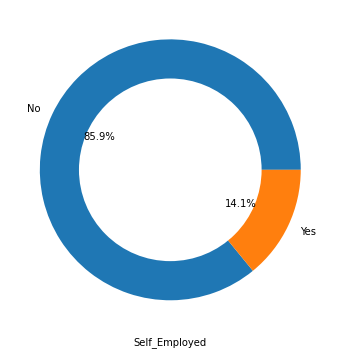

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(8,6))
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Self_Employed")
plt.ylabel('')
plt.figure()  

Around 85.9% of the people are not self-emplyed ,they may be working in private or public sector whereas 14.1% are self employed.

<Figure size 432x288 with 0 Axes>

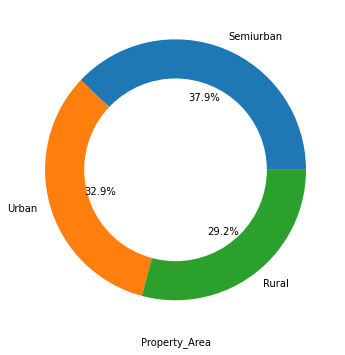

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(8,6))
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Property_Area")
plt.ylabel('')
plt.figure()  

Around 37.9% of the people coming from semiurban area and least is 29,2% coming from rural place.

<Figure size 432x288 with 0 Axes>

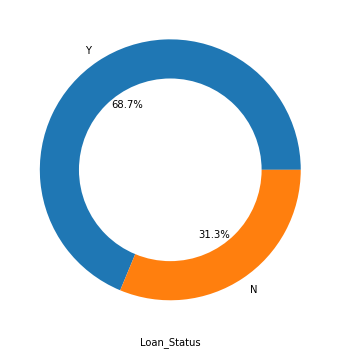

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(8,6))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Loan_Status")
plt.ylabel('')
plt.figure()  

Around 68.7% of the people's loan has been approved    

# Univariate Analaysis for numeric column

In [32]:
def univariateAnalysis_numeric(non_obj,nbins):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df.boxplot(non_obj,patch_artist=True)
    plt.title("BoxPlot of " + non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

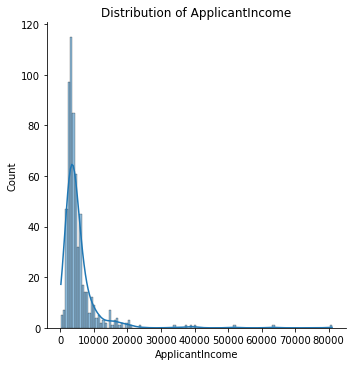

----------------------------------------------------------------------------


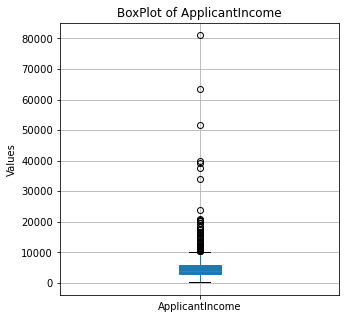

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

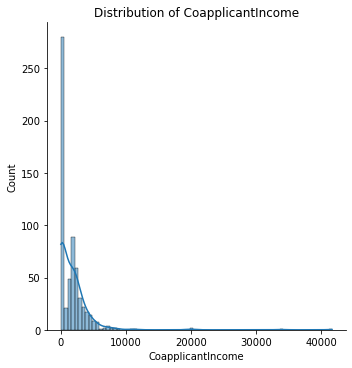

----------------------------------------------------------------------------


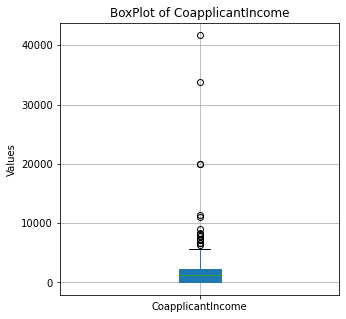

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

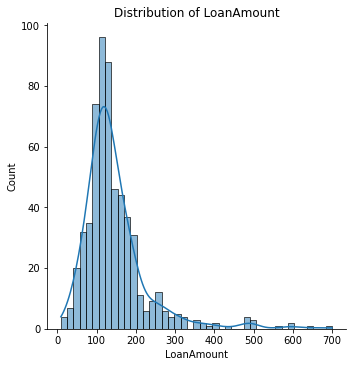

----------------------------------------------------------------------------


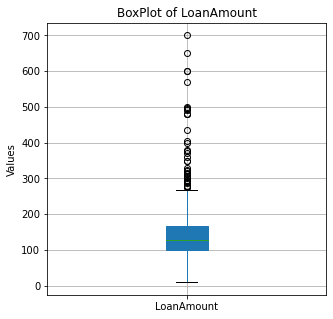

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

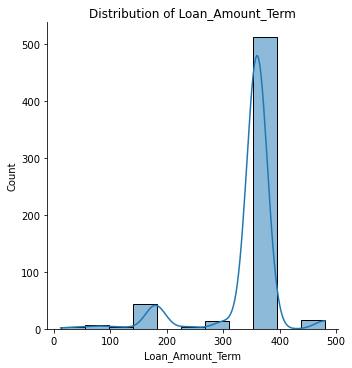

----------------------------------------------------------------------------


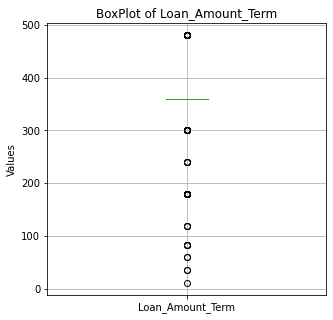

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

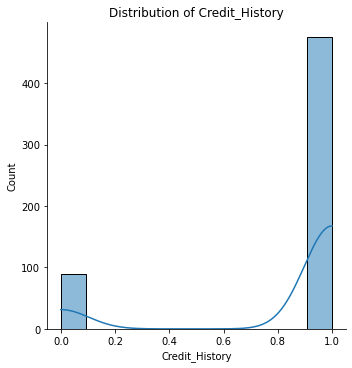

----------------------------------------------------------------------------


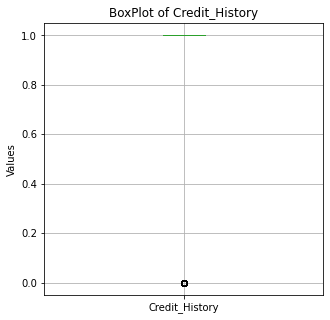

In [33]:
for x in non_obj:
    univariateAnalysis_numeric(x, 100);

Thus we see that the most of the features ,distribution is skewed and using boxplot ,we can say that outliers are present in most of the columns 

# Bivariate Analysis/Multivariate Analysis

<AxesSubplot:title={'center':'Property_Area'}, ylabel='LoanAmount'>

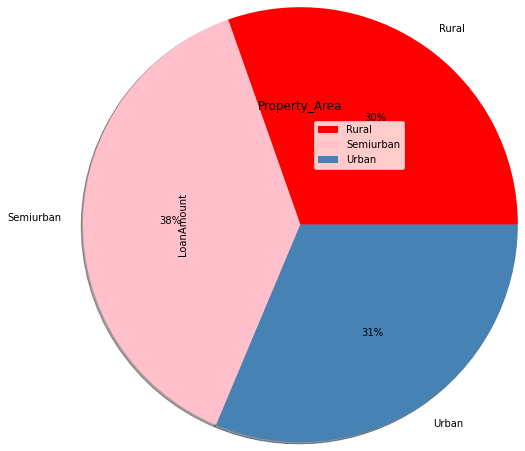

In [34]:
df.groupby(['Property_Area']).sum().plot(kind='pie', y='LoanAmount', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=2.5,shadow=True,
                                title='Property_Area')

According to loan ammount,people are more from semi-uraban area followed by urban and rural. 

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

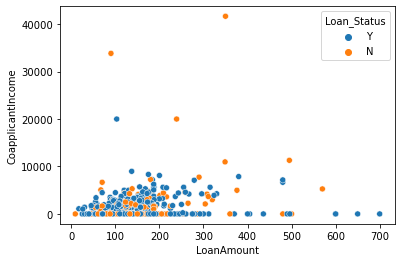

In [35]:
sns.scatterplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')

Thus we see that majority of the coaaplicant income is less than 10000 which has been approved loan amount between 100k-300k. 

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

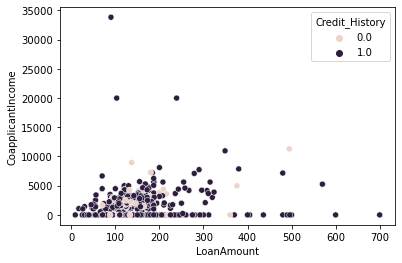

In [36]:
sns.scatterplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')

Majortiy of the coapplicants having credit history for approval of loan. 

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

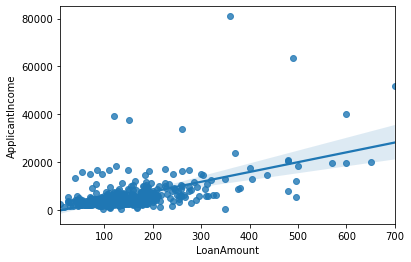

In [37]:
sns.regplot(data=df, x='LoanAmount', y='ApplicantIncome')

Thus we see that applicant income is directly proportinally to loan amount.As in banks/NBFC ,loan amount is derived from applicant incomes.
the more the applicant's income ,the approval for loan amount is more considering all factors like credit_history,
coaaplicants income etc. 

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

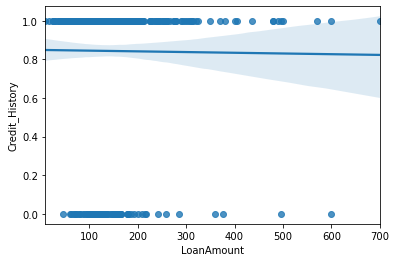

In [38]:
sns.regplot(data=df, x='LoanAmount', y='Credit_History')

For loan amount between 95k approx to 200k approx,credit histroty of 1 is available and beyond that it is likely available. 

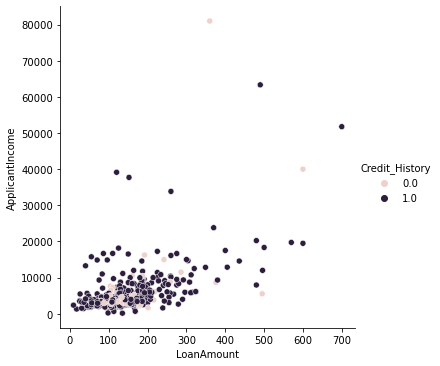

In [39]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')

majority of the applicant income range from 0 to20k has been approved for loan amount range from 0 to 300 
based on the availability of credit history of 1.

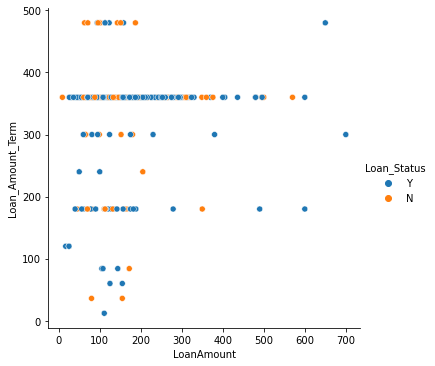

In [40]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

Majority of the applicant has been approved loan amount ranging from 100k-400k having loan term from 300-400 months.
Those who have loan amount ranging from 0-200k ,they have less loan term i.e from 100-200 months.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

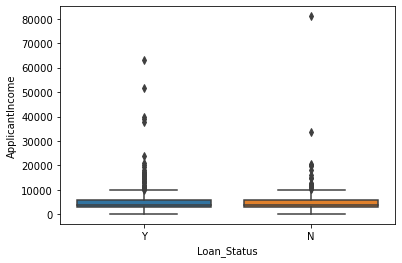

In [41]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

Average income of the applicant is same whether the loan is approved or not.

Average income of applicant is same for loan_status having yes (1) and No(0).

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

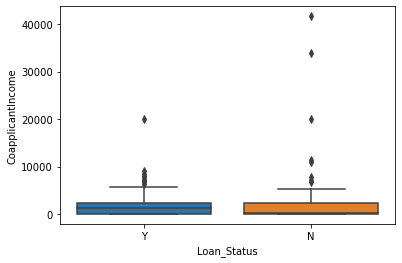

In [42]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df)

Average income of coapplicant having loan status Y (1) is slighlty more than loan_status N (0)

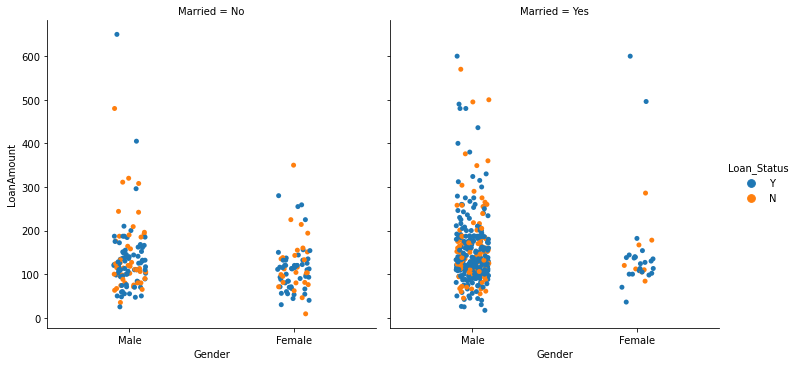

In [43]:
sns.catplot(x="Gender",y="LoanAmount",hue='Loan_Status',col='Married',data=df) 

The loan amount applied by married man are high than the unmarried ones. 

<AxesSubplot:xlabel='LoanAmount', ylabel='Gender'>

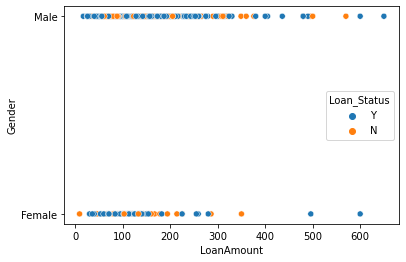

In [44]:
sns.scatterplot(data=df, x='LoanAmount', y='Gender', hue='Loan_Status')

Majority of the male has been approved loan amount ranging from 0-300k.

# HANDLING MISSING VALUES

In [45]:
# filling continous data columns with the mean value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# filling categorical data columns with the mode value of that column
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [46]:
df.isnull().sum() #validating missimg value,we can see there is no missing value. 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding the categorical object  datatype columns

In [47]:
# Label Encoder

le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


Label Encoder is used to convert the object data type in the target column to a numerical format.

In [48]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


Ordinal Encoder is used to convert the categorical data type to a numerical format.

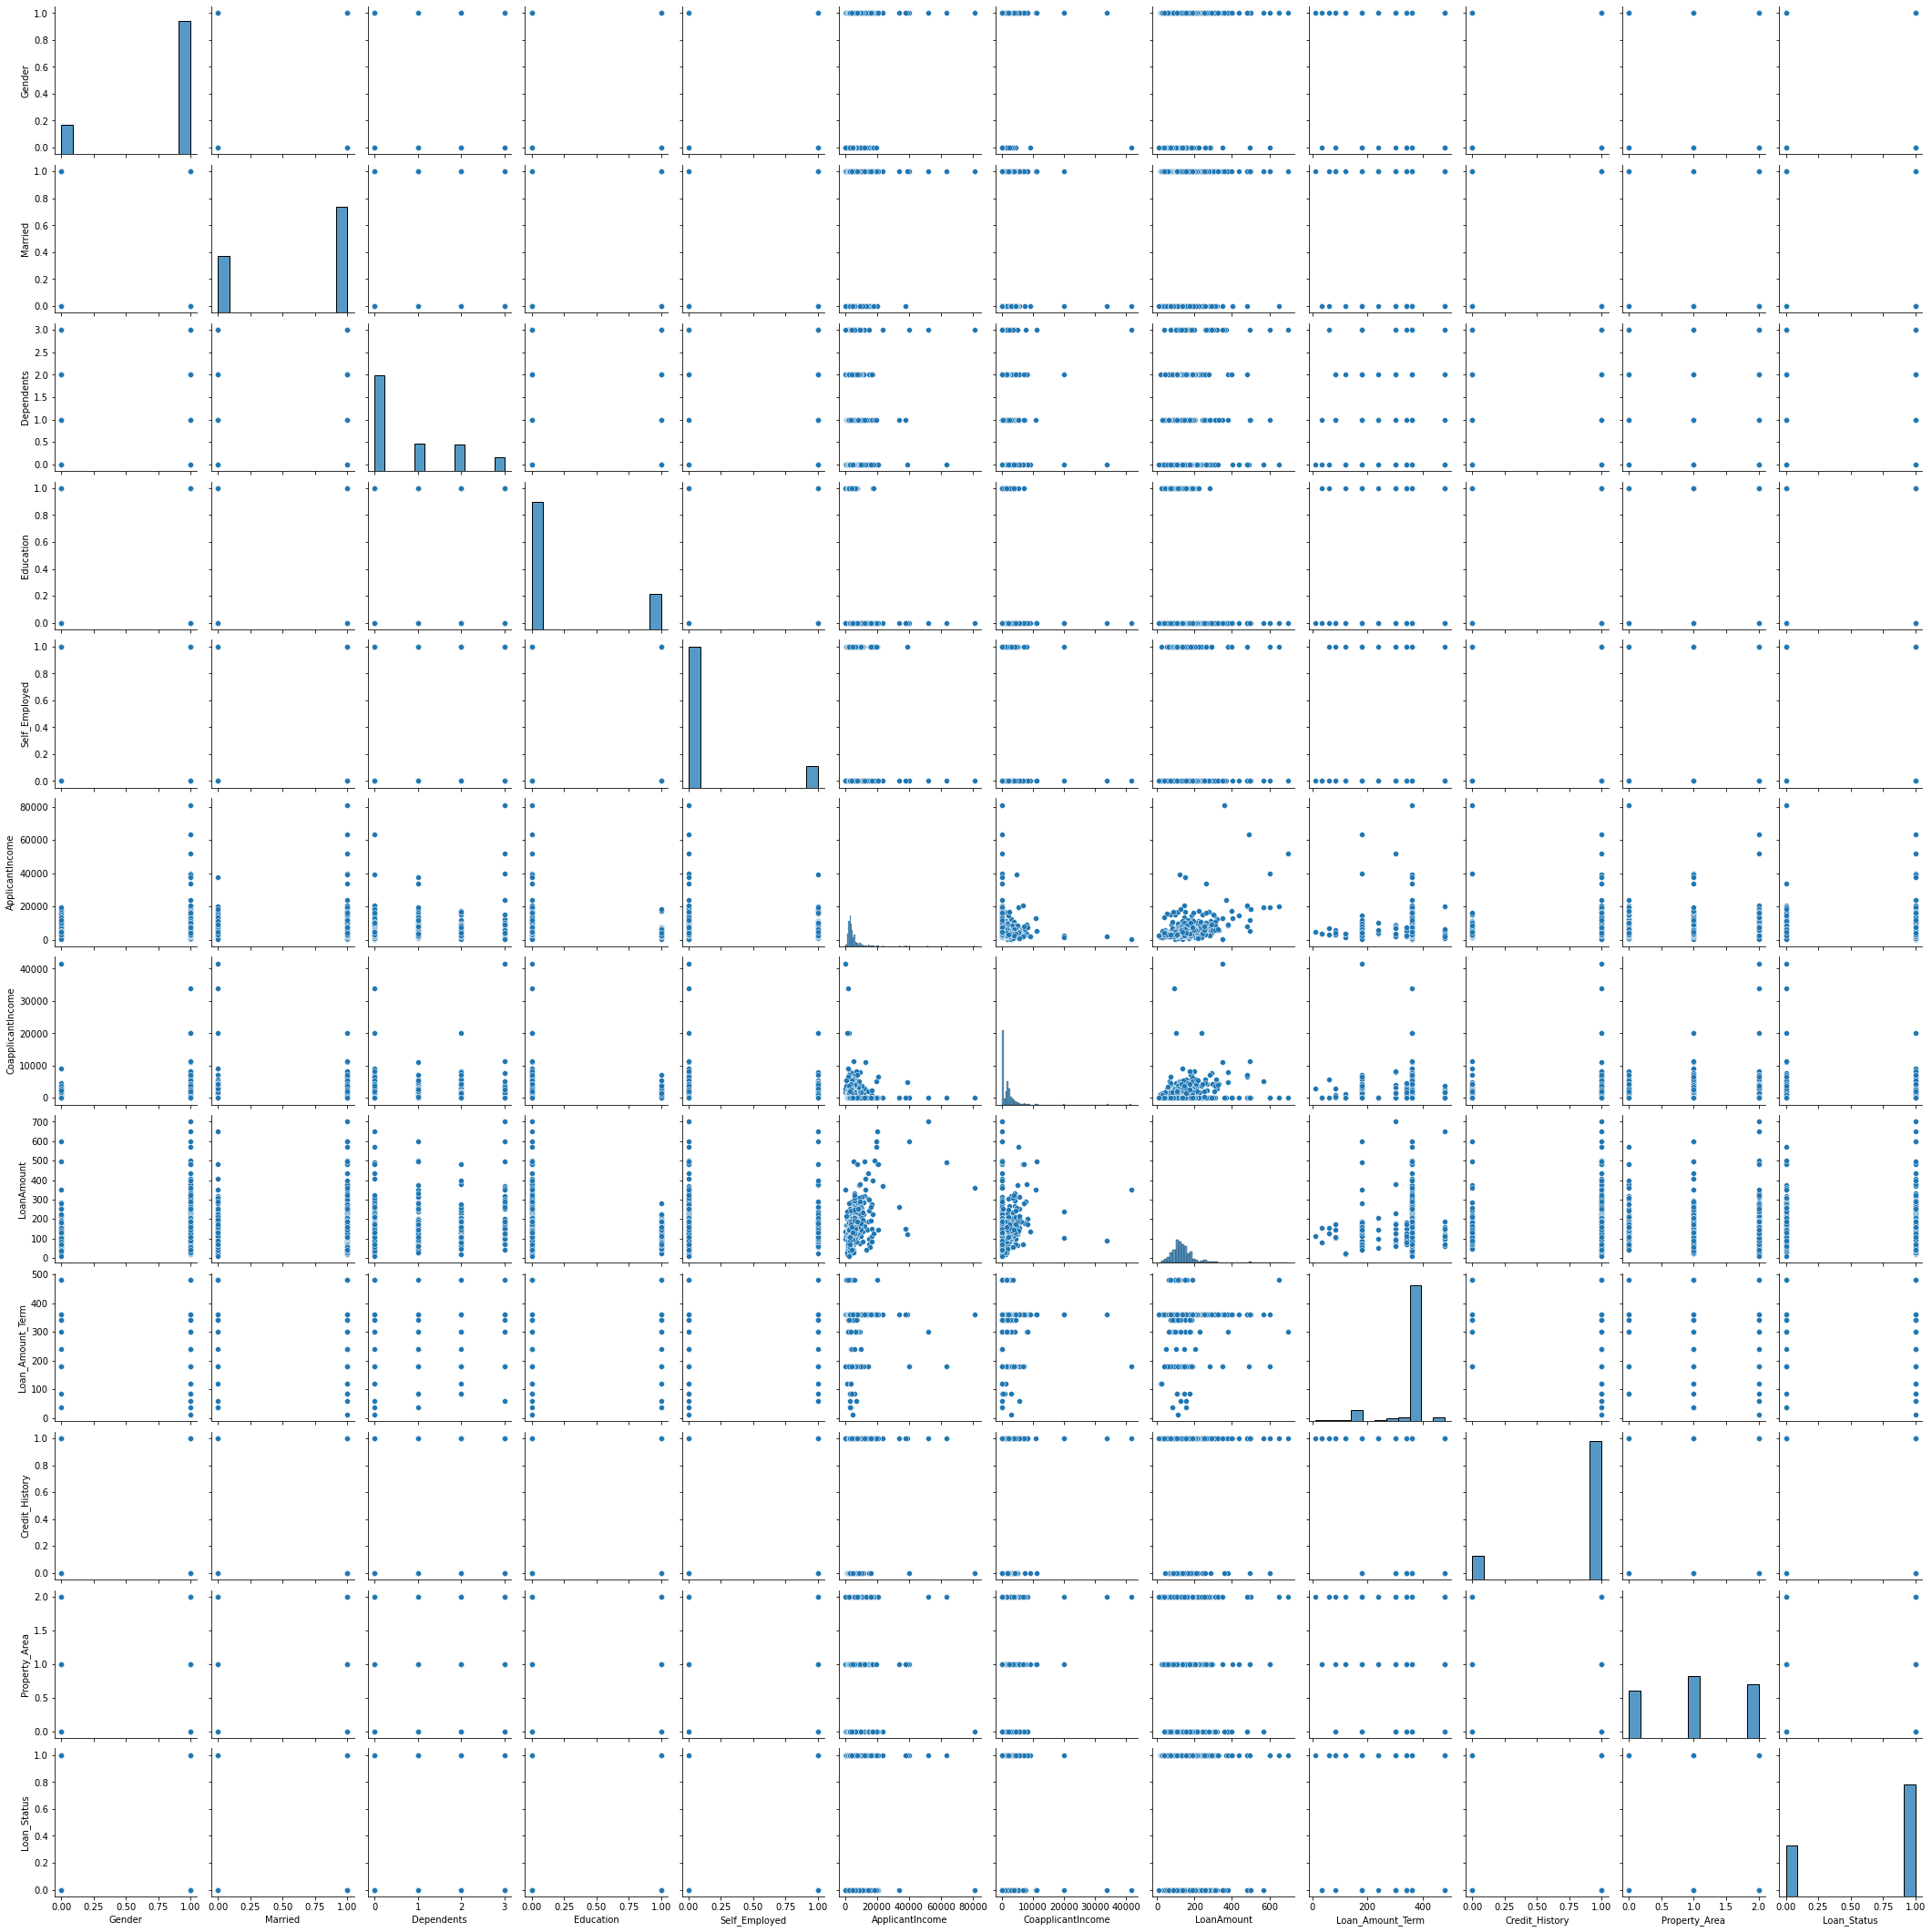

In [407]:
sns.pairplot(df) #shows the correlation among  features.

It shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

In [408]:
corr=df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


It shows the correlation among the features with values.

# checking outliers 
Checking Outliers by Zscore technique

In [409]:
df.shape

(614, 12)

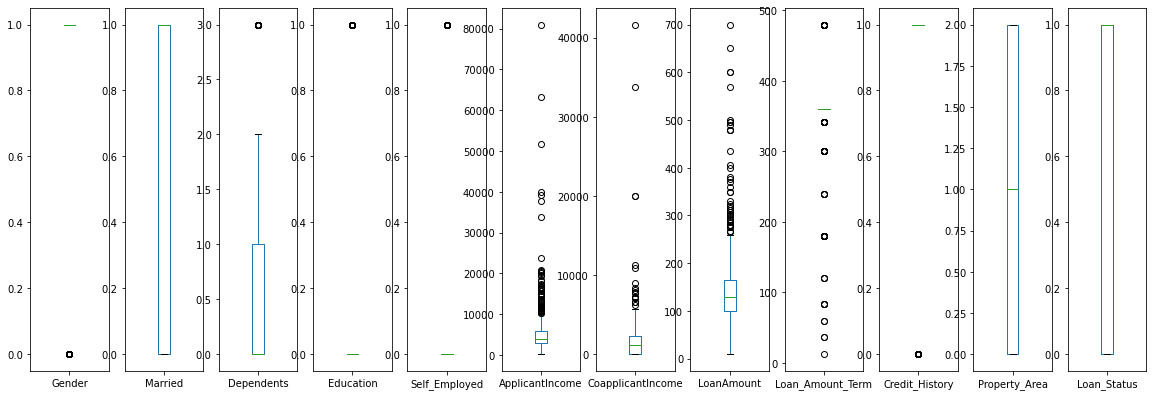

In [410]:
df.plot(kind ='box',subplots = True, figsize =[20,8])
plt.subplots_adjust(bottom=0.25)

thus we see that outliers are present and those which are near to whiskers are not outliers

In [411]:
#removal of outliers
z = np.abs(zscore(df))
threshold = 3
dfnew = df[(z<3).all(axis = 1)]

print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", dfnew.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

df=dfnew.copy() # reassigning to our original dataframe name

Dataframe Shape before removing outliers:  (614, 12)
Dataframe Shape after removing outliers:  (577, 12)
Percentage of data loss after outlier removal:  6.026058631921824


The percentage data loss is around 6.02% which is acceptable

# Correlation using a Heatmap

Positive Correlation:Any score from +0.5 to +1 indicates a very strong positive correlation, which means that they both 
increase at the same time. The line of best fit, or the trend line, is places to best represent the 
data on the graph. In this case, it is following the data points upwards to indicate the positive correlation.

Negative Correlation:
Any score from -0.5 to -1 indicate a strong negative correlation, which means that as one variable increases, 
the other decreases proportionally. The line of best fit can be seen here to indicate the negative correlation. 
In these cases it will slope downwards from the point of origin.

No Correlation
Very simply, a score of 0 indicates that there is no correlation, or relationship, between the two variables.

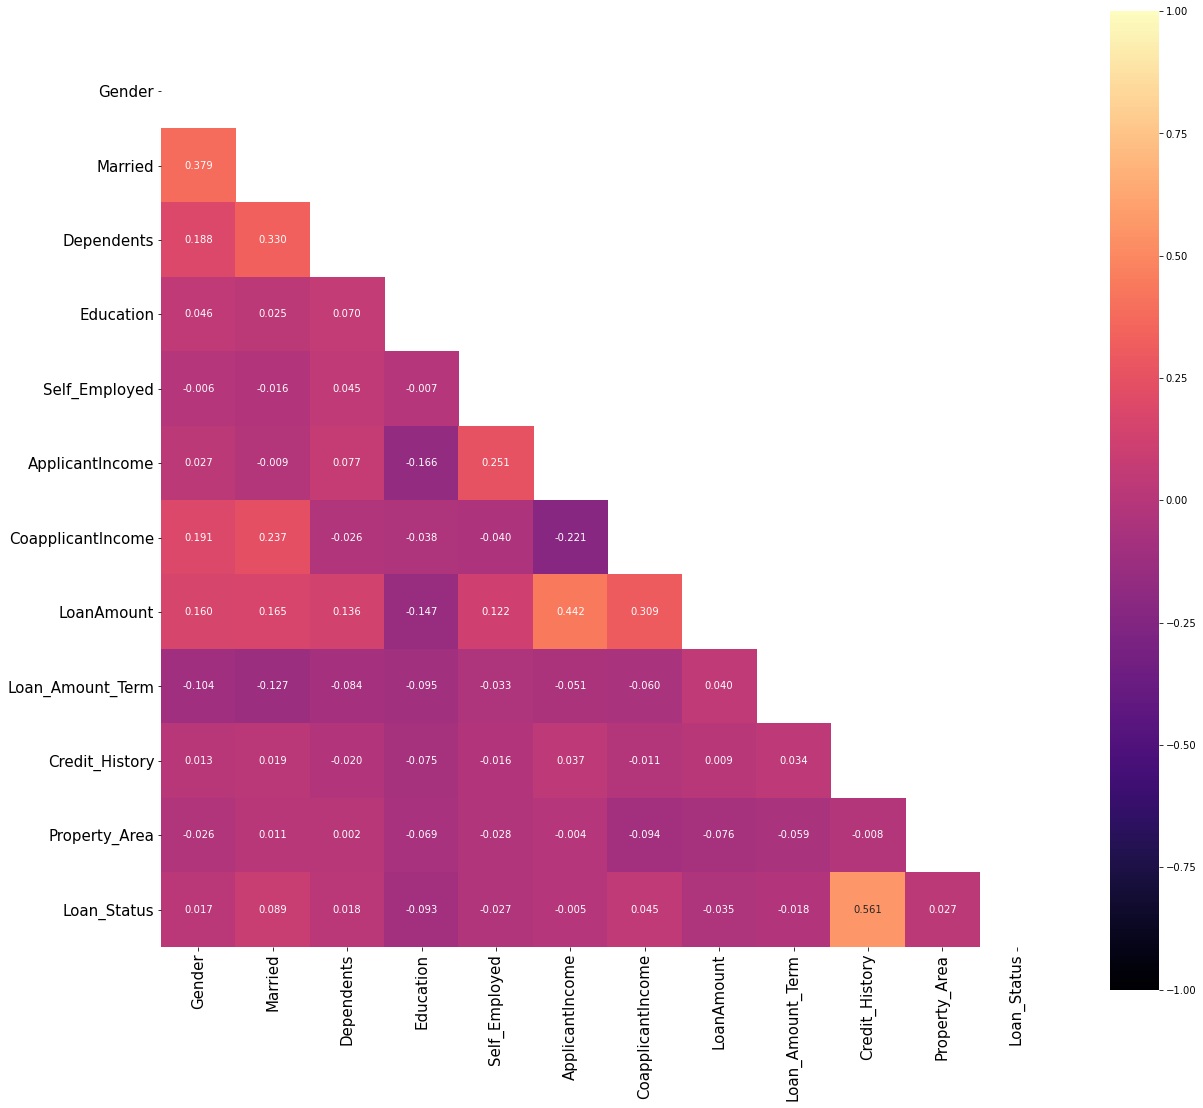

In [351]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Thus we see that theer is no strong multicollinearirty exists between features,Loan_Status depends upon credit history profile
of applicant.Loan_amount depens upon applicant income,as loan amount is derived from income of the applicant.
Thus we can see that some of the features are positively correlated and some are negatively correlated.

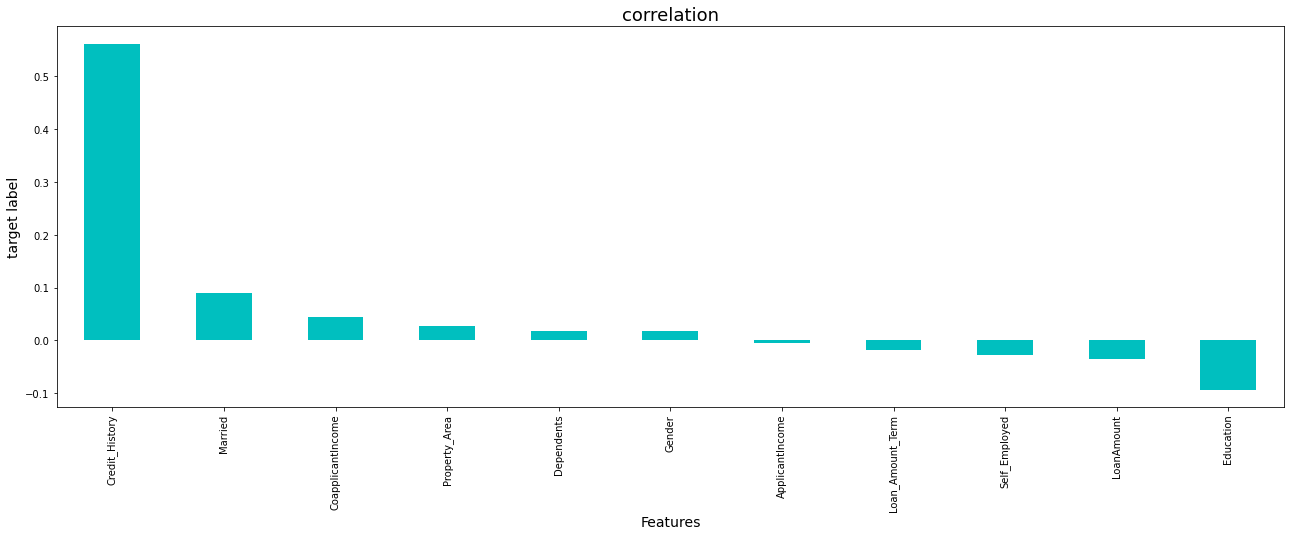

In [352]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
dfnew.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

This shows which are the features important and directly positively related to loan_status,
we see that credit history is positively correlated with loan status.
self_employed,loan amount term,loan amount,education are negatively correlated with loan status.

# checking skewness

In [353]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#Checking for skewness

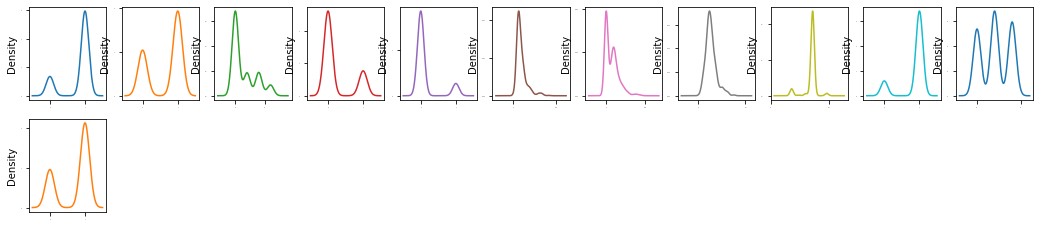

In [354]:

df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Splitting into x and y before removing skewness

In [355]:
x=dfnew.drop('Loan_Status',axis=1)   #Independent variables
y=dfnew['Loan_Status']    #Dependent or Target Variable

In [356]:
#Checking x data
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0


In [357]:
y.head() #checking target column data

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [358]:
#Log transform for numerical datatype 
for col in x:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Thus we see most of the numerical datatype columns skewness have been removed and not taking into consideration categorical column for skewness chekcing as we don not treat skewness for categorical varibale and we dont touch target varibale for skewness too..

# Removing imbalance issue in label column using SMOTE

In [229]:
#  samples to make all the target categorical  values same
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [230]:
y.value_counts() #balanced data

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

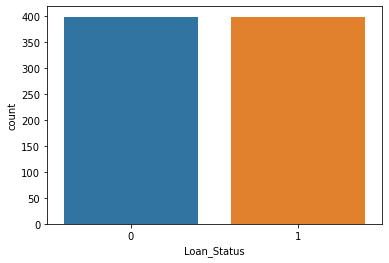

In [231]:
sns.countplot(y) #showing balanced data visiually

Thus we see that target column is balanced now

# Feature Scaling

In [232]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.470572,-1.390585,-0.773057,-0.581416,-0.381335,0.709666,-1.135034,0.345767,0.251082,0.586849,1.217573
1,0.470572,0.739725,0.601123,-0.581416,-0.381335,0.252005,0.778384,0.021429,0.251082,0.586849,-1.301088
2,0.470572,0.739725,-0.773057,-0.581416,2.857026,-0.542999,-1.135034,-1.571139,0.251082,0.586849,1.217573
3,0.470572,0.739725,-0.773057,1.848787,-0.381335,-0.823761,0.895186,-0.134206,0.251082,0.586849,1.217573
4,0.470572,-1.390585,-0.773057,-0.581416,-0.381335,0.757491,-1.135034,0.254836,0.251082,0.586849,1.217573


Feature Scaling is the process of bringing all of the features of a Machine Learning problem to a similar scale or range.
Thus we see that it has normalises the independent and dependent features.

# MODEL BUILDING

# Base model:Logistic Regression

In [233]:
lg = LogisticRegression()
from sklearn.model_selection import train_test_split

In [238]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8212927756653993 on Random State 696


Thus we see that at random state 696,the best accuracy score is 82.12%

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=696) 

In [240]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[38 90]
 [49 86]]
              precision    recall  f1-score   support

           0       0.44      0.30      0.35       128
           1       0.49      0.64      0.55       135

    accuracy                           0.47       263
   macro avg       0.46      0.47      0.45       263
weighted avg       0.46      0.47      0.46       263



The accuracy score for logistic regression is 47%  and 
Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=38,It states that 38 positive class data points were correctly classified by the model.

True Negative(TN)=86,It states that 86 negative class data points were correctly classified by the model.

False Positive(FP)=90,It states that 90 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=49 ,It states that 49 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its not a  good classifier as from our dataset as there is large number of false positive and false negative values.

# Cross validation score for logistic regression

In [241]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
css=accuracy_score(y_test,pred_lg)

In [242]:
for j in range(2,15):
    css_score=cross_val_score(lg,x,y,cv=j)
    csc=css_score.mean()
    print("At cv:-",j)
    print("cross validation score is :-",csc*100)
    print("accuracy score is :-",css*100)
    print('\n')

At cv:- 2
cross validation score is :- 73.86934673366834
accuracy score is :- 81.74904942965779


At cv:- 3
cross validation score is :- 74.62713387241689
accuracy score is :- 81.74904942965779


At cv:- 4
cross validation score is :- 74.74874371859298
accuracy score is :- 81.74904942965779


At cv:- 5
cross validation score is :- 75.50864779874213
accuracy score is :- 81.74904942965779


At cv:- 6
cross validation score is :- 75.75662641452115
accuracy score is :- 81.74904942965779


At cv:- 7
cross validation score is :- 75.25339898418612
accuracy score is :- 81.74904942965779


At cv:- 8
cross validation score is :- 75.38888888888889
accuracy score is :- 81.74904942965779


At cv:- 9
cross validation score is :- 75.3929746907275
accuracy score is :- 81.74904942965779


At cv:- 10
cross validation score is :- 75.12816455696203
accuracy score is :- 81.74904942965779


At cv:- 11
cross validation score is :- 75.5171578801716
accuracy score is :- 81.74904942965779


At cv:- 12
cross val

We will be taking cv=5 as there is no high gap between cross validation score and accuracy score.

In [243]:
csc_selected=cross_val_score(lg,x,y,cv=5).mean()
print("The  cv score is :-",csc_selected *100,"\n The accuracy score is ",css*100)

The  cv score is :- 75.50864779874213 
 The accuracy score is  81.74904942965779


So we will be taking cross validation score of 75% instead of accuracy score of 81.7%. as it might have reduced overfitting problem.

# Modelling-Other models

In [245]:
#Modelling
#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=696)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[108  20]
 [ 36  99]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       128
           1       0.83      0.73      0.78       135

    accuracy                           0.79       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.79      0.79      0.79       263



The accuracy score for DecisionTreeClassifier is 79% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=108,It states that 108 positive class data points were correctly classified by the model.

True Negative(TN)=99,It states that 99 negative class data points were correctly classified by the model.

False Positive(FP)=20,It states that 20 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=36 ,It states that 36 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

In [246]:
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=24)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[112  16]
 [ 19 116]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       128
           1       0.88      0.86      0.87       135

    accuracy                           0.87       263
   macro avg       0.87      0.87      0.87       263
weighted avg       0.87      0.87      0.87       263



The accuracy score for Random Forest Classifier is 87% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=112,It states that 112 positive class data points were correctly classified by the model.

True Negative(TN)=116,It states that 116 negative class data points were correctly classified by the model.

False Positive(FP)=16,It states that 16 negative class data points were incorrectly classified as belonging to the positive class by the model

False Negative(FN)=19 ,It states that 19 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a very good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values and errors is less.

In [247]:
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=24)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[102  26]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       128
           1       0.81      0.84      0.82       135

    accuracy                           0.82       263
   macro avg       0.82      0.82      0.82       263
weighted avg       0.82      0.82      0.82       263



The accuracy score for AdaBoostClassifier is 82% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=102,It states that 102 positive class data points were correctly classified by the model.

True Negative(TN)=113,It states that 113 negative class data points were correctly classified by the model.

False Positive(FP)=26,It states that 26 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=22 ,It states that 22 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [248]:
#Model 4- KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=15)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[ 90  38]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       128
           1       0.75      0.84      0.79       135

    accuracy                           0.77       263
   macro avg       0.78      0.77      0.77       263
weighted avg       0.78      0.77      0.77       263



The accuracy score for KNeighborsClassifier is 77% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=90,It states that 90 positive class data points were correctly classified by the model.

True Negative(TN)=113,It states that 113 negative class data points were correctly classified by the model.

False Positive(FP)=38,It states that 38 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=113 ,It states that 113 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it is able to disntinguisn larger number of true positive and true negative values.

In [251]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=696)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[ 93  35]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       128
           1       0.77      0.88      0.82       135

    accuracy                           0.81       263
   macro avg       0.81      0.80      0.80       263
weighted avg       0.81      0.81      0.80       263



The accuracy score for SVM is 81% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=93,It states that 93 positive class data points were correctly classified by the model.

True Negative(TN)=119,It states that 119 negative class data points were correctly classified by the model.

False Positive(FP)=35,It states that 35 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=16 ,It states that 16 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it is bale to distinguish larger number of true positive and true negative values.

Thus we see,

The accuracy score of Decision tree classifier is 79%

The accuracy score of Random Forest Classifier is 87%

The accuracy score of Kneighbors Classifier is 77%

The accuracy score of Ada Boosting is 82%

The accuracy score of Support vector machine (SVM) is 81%

Conclusion: We see that almost all the models are showing good accuracy rate ,now we will check cross validation for all the models for overfitting.

# CROSS VALIDATION For the models

Performing cross validation in all the models below:

In [252]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.7550864779874213


In [253]:
scr=cross_val_score(model1,x,y,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.7714229559748429


In [254]:
scr=cross_val_score(model2,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.8330345911949685


In [255]:
scr=cross_val_score(model3,x,y,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.765180817610063


In [256]:
scr=cross_val_score(model4,x,y,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.7449999999999999


In [257]:
scr=cross_val_score(model5,x,y,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.7562814465408805


Thus we see that after doing cross validation ,we can see the scores that Cross validation score of all the models have been
reduced which means that cross validation is not decreasing the accuracy,it is rather giving us a better approximation for
that accuracy, including less overfitting.So as per the avobe models:

Cross validation score :

Logistic Regression:75.51%

DEsicion Tree:77.14%

RandomForest:83.30%

AdaBoost:76.51%

GradientBoosting:74.49%

SVM:75.62%

So I am taking Random Forest rather for hyperparameter tuning under GridSearch as from the confusion matrix 
also we can see less error are detected by randomforest model compare to SVM.

# HYper parameter tuning

In [289]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [290]:
GCV = GridSearchCV(model2,parameters, cv= 5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_ #printing the best parameter found by gridsearch cv

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

These are my best hyper parameters:  'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200
for random forest classifier

In [291]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best paramter
accuracy_score(y_test,GCV_pred) #checking final accuracy

0.8821292775665399

Thus after cross validation and then doing hypertuning with best parametrs the accuracy score
has improved from 87% to 88% very little improvememt is there.We will take this as our best fit model.

# AUC_ROC PLOT

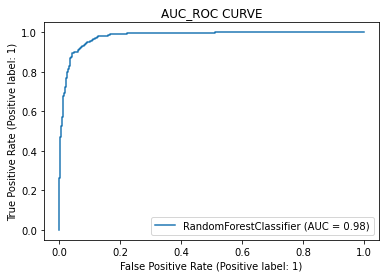

In [292]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x,y)
plt.title("AUC_ROC CURVE")
plt.show()

OBSERVATION: So final accuracy  is 88.21% and auc_roc score is 98 % which is very good and here we can see our AUC (c-value) is far greater than 0.5 ,it is 0.98 which can be considered very good which means that the classifier is able to disntinguish between 0 and 1. So it can distinguish  the loan given to applicant will be approved or not.We can defintly employ this model.

# MODEL SAVING

In [294]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='loanprediction.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

# CONCLUSION:

In [295]:
loaded_model=pickle.load(open('loanprediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #getting 88.22% which is very good.

88.212927756654


# Prediction Test

In [299]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
Predicted,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0
Original,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0


This test shows that the model is able to predict the correct result around 88% and rest it is predicting wrong.